In [1]:
import pandas as pd
import numpy as np

# Step 1: Create a synthetic dataset
np.random.seed(42)  # for reproducibility
n_patients = 25

# Generate previous and new TTPs (in months)
previous_ttp = np.random.uniform(2, 6, n_patients)
new_ttp = previous_ttp * np.random.uniform(0.5, 2.0, n_patients)

# Create DataFrame
df = pd.DataFrame({
    'Patient_ID': [f'P{i+1}' for i in range(n_patients)],
    'TTP_Previous': np.round(previous_ttp, 2),
    'TTP_New': np.round(new_ttp, 2)
})

# Step 2: Calculate GMI
df['GMI'] = df['TTP_New'] / df['TTP_Previous']

# Step 3: Clinical benefit if GMI >= 1.3
df['Clinical_Benefit'] = df['GMI'] >= 1.3



In [2]:
# Display the DataFrame
#import ace_tools as tools; 
#tools.display_dataframe_to_user(name="GMI Patient Data", dataframe=df)
import ace_tools_open as tools; tools.display_dataframe_to_user(name="GMI Patient Data", dataframe=df)


GMI Patient Data


In [3]:
!pip install acetools


ERROR: Could not find a version that satisfies the requirement acetools (from versions: none)
ERROR: No matching distribution found for acetools


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


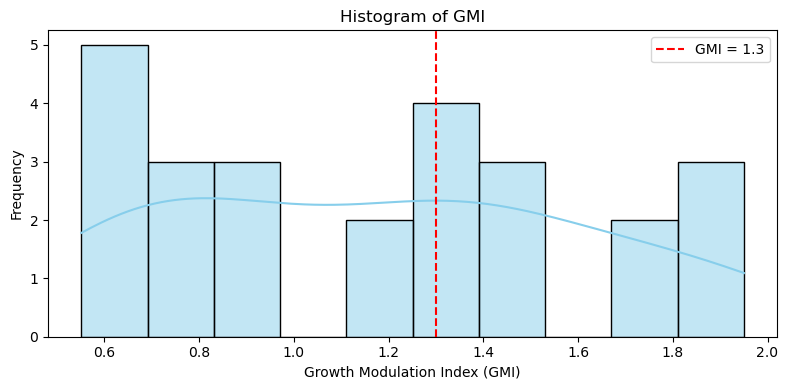

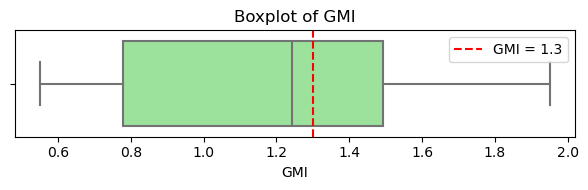

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['GMI'], bins=10, kde=True, color='skyblue')
plt.axvline(1.3, color='red', linestyle='--', label='GMI = 1.3')
plt.title('Histogram of GMI')
plt.xlabel('Growth Modulation Index (GMI)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['GMI'], color='lightgreen')
plt.axvline(1.3, color='red', linestyle='--', label='GMI = 1.3')
plt.title('Boxplot of GMI')
plt.xlabel('GMI')
plt.legend()
plt.tight_layout()
plt.show()


In [5]:
# Calculate percentage of patients with clinical benefit (GMI ≥ 1.3)
clinical_benefit_count = df['Clinical_Benefit'].sum()
total_patients = len(df)
percentage_benefit = (clinical_benefit_count / total_patients) * 100

print(f"Number of patients with GMI ≥ 1.3: {clinical_benefit_count} out of {total_patients}")
print(f"Percentage with clinical benefit: {percentage_benefit:.2f}%")


Number of patients with GMI ≥ 1.3: 10 out of 25
Percentage with clinical benefit: 40.00%


In [6]:
# Save the DataFrame to a CSV file
df.to_csv("gmi_patient_data.csv", index=False)

# Save the summary statistics to another CSV file
summary_df = pd.DataFrame({
    'Metric': ['Total Patients', 'Patients with GMI ≥ 1.3', 'Percentage with Clinical Benefit'],
    'Value': [total_patients, clinical_benefit_count, f"{percentage_benefit:.2f}%"]
})
summary_df.to_csv("gmi_summary_report.csv", index=False)

print("Data and summary successfully saved as 'gmi_patient_data.csv' and 'gmi_summary_report.csv'.")


Data and summary successfully saved as 'gmi_patient_data.csv' and 'gmi_summary_report.csv'.


In [7]:
summary_df

,Metric,Value
0,Total Patients,25
1,Patients with GMI ≥ 1.3,10
2,Percentage with Clinical Benefit,40.00%


In [8]:
df

,Patient_ID,TTP_Previous,TTP_New,GMI,Clinical_Benefit
0,P1,3.50,5.87,1.677143,True
1,P2,5.80,4.64,0.800000,False
2,P3,4.93,6.27,1.271805,False
3,P4,4.39,6.10,1.389522,True
4,P5,2.62,1.49,0.568702,False
5,P6,2.62,3.70,1.412214,True
6,P7,2.23,1.69,0.757848,False
7,P8,5.46,3.27,0.598901,False
8,P9,4.40,8.47,1.925000,True
9,P10,4.83,9.42,1.950311,True
